In [18]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [14]:
# !pip install html5lib
# !pip install beautifulsoup4
# !pip install requests
# ---uncomment above if not installed---

# importing modules

 
# URL for scrapping data
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'
 
# get URL html
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
 
data = []
 
# soup.find_all('td') will scrape every
# element in the url's table
data_iterator = iter(soup.find_all('td'))
 
# data_iterator is the iterator of the table
# This loop will keep repeating till there is
# data available in the iterator
while True:
    try:
        country = next(data_iterator).text
        confirmed = next(data_iterator).text
        deaths = next(data_iterator).text
        continent = next(data_iterator).text
 
        # For 'confirmed' and 'deaths',
        # make sure to remove the commas
        # and convert to int
        data.append([
            country,
            int(confirmed.replace(',', '')),
            int(deaths.replace(',', '')),
            continent
        ])
 
    # StopIteration error is raised when
    # there are no more elements left to
    # iterate through
    except StopIteration:
        break
 
# Sort the data by the number of confirmed cases
data.sort(key = lambda row: row[1], reverse = True)
data

[['United States', 81832612, 1008198, 'North America'],
 ['India', 43028863, 521388, 'Asia'],
 ['Brazil', 29999816, 660269, 'South America'],
 ['France', 25997852, 142506, 'Europe'],
 ['Germany', 21646375, 130563, 'Europe'],
 ['United Kingdom', 21216874, 165570, 'Europe'],
 ['Russia', 17896866, 369708, 'Europe'],
 ['Turkey', 14894731, 98157, 'Asia'],
 ['Italy', 14845815, 159784, 'Europe'],
 ['South Korea', 14001406, 17453, 'Asia'],
 ['Spain', 11551574, 102541, 'Europe'],
 ['Vietnam', 9818328, 42600, 'Asia'],
 ['Argentina', 9041124, 128065, 'South America'],
 ['Netherlands', 7910315, 22013, 'Europe'],
 ['Iran', 7167646, 140315, 'Asia'],
 ['Japan (+Diamond Princess)', 6654553, 28261, 'Asia'],
 ['Colombia', 6085926, 139660, 'South America'],
 ['Indonesia', 6019981, 155288, 'Asia'],
 ['Poland', 5969621, 115345, 'Europe'],
 ['Mexico', 5666215, 323223, 'North America'],
 ['Ukraine', 4968881, 107980, 'Europe'],
 ['Australia', 4708056, 6391, 'Australia/Oceania'],
 ['Malaysia', 4246467, 35099, 

In [15]:
type(data)
for n in data:
    print(n)
    

['United States', 81832612, 1008198, 'North America']
['India', 43028863, 521388, 'Asia']
['Brazil', 29999816, 660269, 'South America']
['France', 25997852, 142506, 'Europe']
['Germany', 21646375, 130563, 'Europe']
['United Kingdom', 21216874, 165570, 'Europe']
['Russia', 17896866, 369708, 'Europe']
['Turkey', 14894731, 98157, 'Asia']
['Italy', 14845815, 159784, 'Europe']
['South Korea', 14001406, 17453, 'Asia']
['Spain', 11551574, 102541, 'Europe']
['Vietnam', 9818328, 42600, 'Asia']
['Argentina', 9041124, 128065, 'South America']
['Netherlands', 7910315, 22013, 'Europe']
['Iran', 7167646, 140315, 'Asia']
['Japan (+Diamond Princess)', 6654553, 28261, 'Asia']
['Colombia', 6085926, 139660, 'South America']
['Indonesia', 6019981, 155288, 'Asia']
['Poland', 5969621, 115345, 'Europe']
['Mexico', 5666215, 323223, 'North America']
['Ukraine', 4968881, 107980, 'Europe']
['Australia', 4708056, 6391, 'Australia/Oceania']
['Malaysia', 4246467, 35099, 'Asia']
['Israel', 3943153, 10530, 'Asia']
['

In [16]:
fields = ['Country', 'Cases', 'Deaths', 'Region'] 
with open('covid.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(data)

In [17]:
dataset = pd.read_csv("covid.csv",encoding='latin-1')
dataset

,Country,Cases,Deaths,Region
0,United States,81832612,1008198,North America
1,India,43028863,521388,Asia
2,Brazil,29999816,660269,South America
3,France,25997852,142506,Europe
4,Germany,21646375,130563,Europe
...,...,...,...,...
221,MS Zaandam,9,2,NaN
222,Marshall Islands,7,0,Australia/Oceania
223,Niue,7,0,Australia/Oceania
224,Saint Helena,2,0,Africa


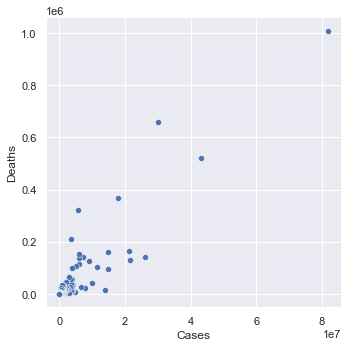

In [24]:
sns.relplot(x="Cases", y="Deaths", data=dataset);

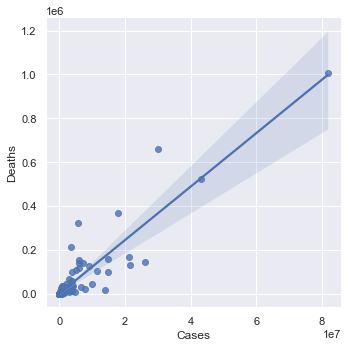

In [27]:
sns.lmplot(x="Cases", y="Deaths", data=dataset);